INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6csudcif/ywqjd2uz.json


Index(['Date', 'Salinity (ppt)', 'DissolvedOxygen (mg/L)', 'pH',
       'SecchiDepth (m)', 'WaterDepth (m)', 'WaterTemp (C)', 'AirTemp (C)'],
      dtype='object')


DEBUG:cmdstanpy:input tempfile: /tmp/tmp6csudcif/0c1ncspu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64070', 'data', 'file=/tmp/tmp6csudcif/ywqjd2uz.json', 'init=/tmp/tmp6csudcif/0c1ncspu.json', 'output', 'file=/tmp/tmp6csudcif/prophet_modelao3clgm0/prophet_model-20240523170534.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:05:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:05:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


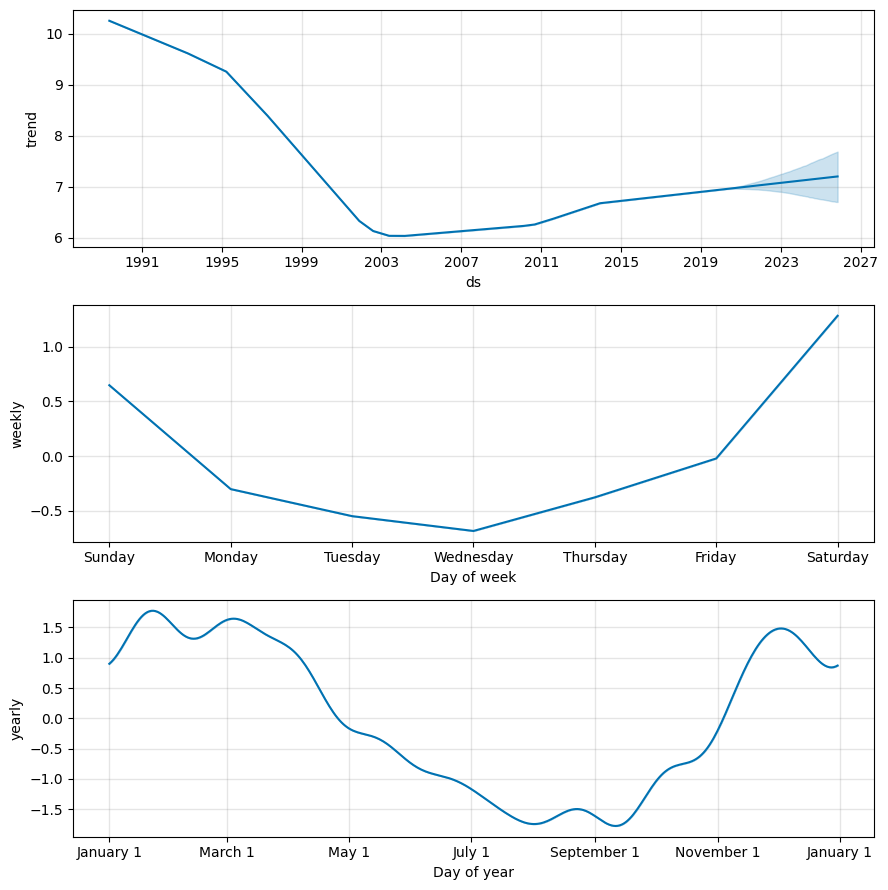

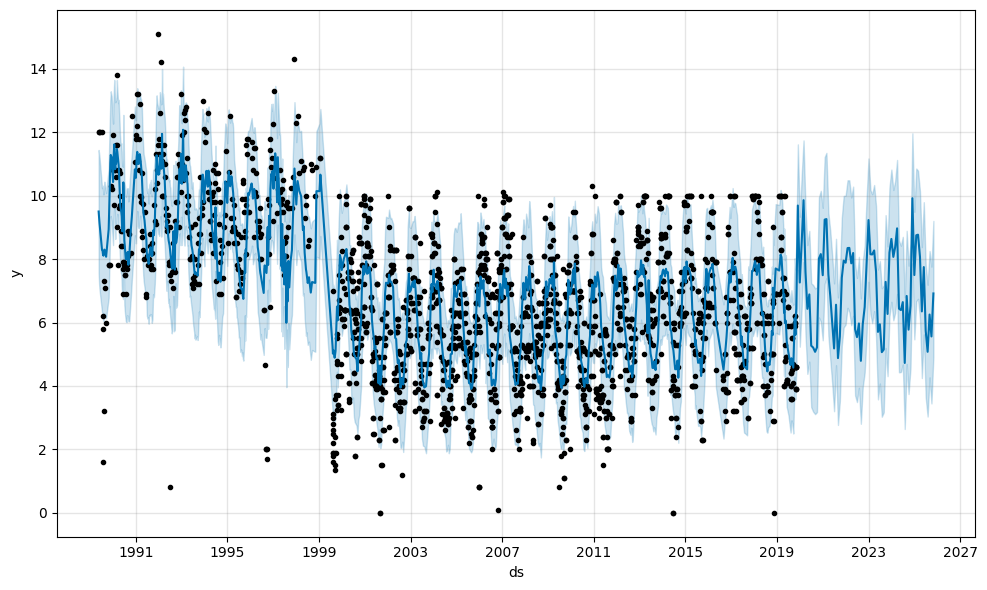

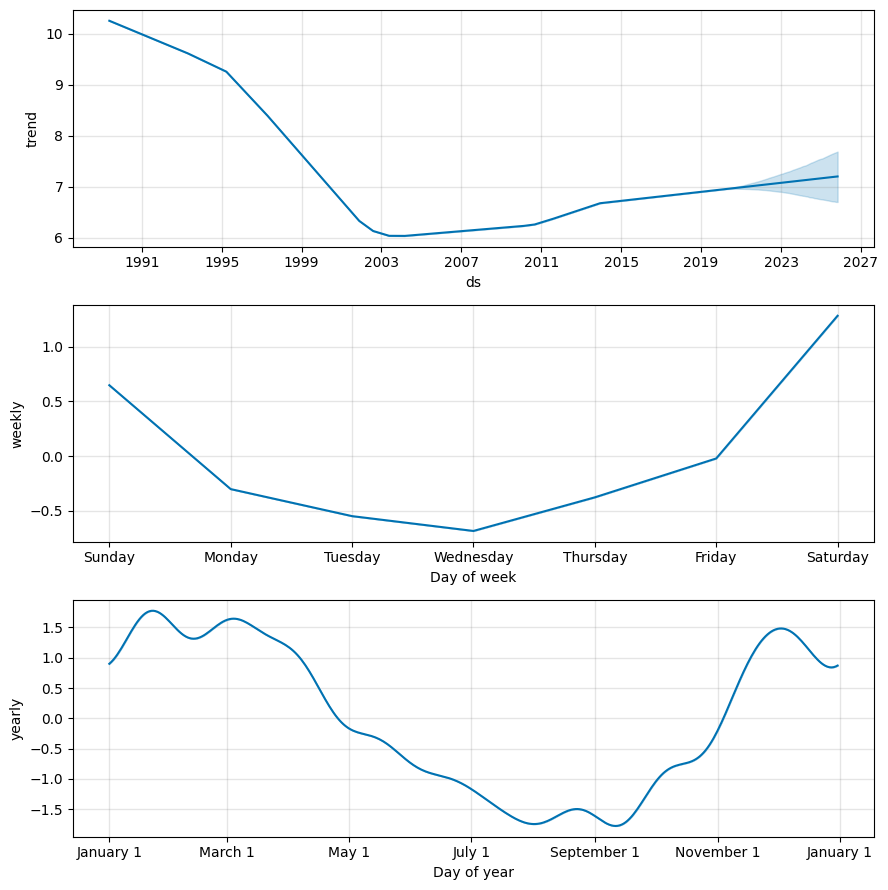

In [13]:
import pandas as pd
from prophet import Prophet

# Load the dataset
df = pd.read_csv('/content/waterquality.csv')

# Inspect the columns to find the correct date column name
print(df.columns)

# Preprocess the data
df['Date'] = pd.to_datetime(df['Date'])
df.fillna(method='ffill', inplace=True)

# Select target (DissolvedOxygen (mg/L)) for prediction
target = 'DissolvedOxygen (mg/L)'
df_prophet = df[['Date', target]].rename(columns={'Date': 'ds', target: 'y'})

# Train-test split (optional, not needed for Prophet)
# train_data = df_prophet[df_prophet['ds'] < '2025-01-01']
# test_data = df_prophet[df_prophet['ds'] >= '2025-01-01']

# Initialize and fit the Prophet model
model = Prophet()
model.fit(df_prophet)

# Make future predictions
future = model.make_future_dataframe(periods=6*12, freq='M')  # 6 years into future
forecast = model.predict(future)

# Plot forecast
model.plot(forecast)
model.plot_components(forecast)
